# **Algorithm "Support Vector Classfication" for Classification Problems cp1, cp2, cp3**


* AJAY VIKRAM SINGH: A0020986B  e0384189@u.nus.edu
* RAHUL JALAN: A0195299H  e0384930@u.nus.edu


## Classification problem cp1

In [14]:
# The target variable 'readmitted' has 3 values - 
# Value '0' for 'No Readmit'
# Value '1' for 'Readmit >30 days'
# Value '2' for 'Readmit < 30 days'

# The original cleaned data was imbalanced, hence upsampling and downsampling is done
# Test Train split is done prior to balancing exercise
# Three datasets are available post balancing -  cp1_test.csv,  cp1_train_upsampled.csv, cp1_train_downsampled.csv


In [15]:
# Import needed libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

In [16]:
# Read the datasets
df_cp1_test = pd.read_csv('.\cp1\cp1_test.csv')
df_cp1_train_up = pd.read_csv('.\cp1\cp1_train_upsampled.csv')
df_cp1_train_dn = pd.read_csv('.\cp1\cp1_train_downsampled.csv')

In [17]:
# Check basic Shape of Dataframe

print("\n cp1_test Dataframe Rows = ", len(df_cp1_test.index))
print("\n cp1_test Dataframe Columns = ", len(df_cp1_test.columns))

print("\n cp1_train_upsampled Dataframe Rows = ", len(df_cp1_train_up.index))
print("\n cp1_train_upsampled Dataframe Columns = ", len(df_cp1_train_up.columns))

print("\n cp1_train_downsampled Dataframe Rows = ", len(df_cp1_train_dn.index))
print("\n cp1_train_downsampled Dataframe Columns = ", len(df_cp1_train_dn.columns))


 cp1_test Dataframe Rows =  24873

 cp1_test Dataframe Columns =  44

 cp1_train_upsampled Dataframe Rows =  119973

 cp1_train_upsampled Dataframe Columns =  44

 cp1_train_downsampled Dataframe Rows =  25227

 cp1_train_downsampled Dataframe Columns =  44


In [18]:
# Set pandas options to display appropriate number of columns
pd.set_option("display.max_columns", 50)

In [19]:
df_cp1_test.describe()

,Unnamed: 0,Unnamed: 0.1,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,insulin_Down,insulin_No,insulin_Steady,insulin_Up,readmitted
count,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000
mean,49716.935271,50835.621477,4.378081,43.237888,1.345113,16.018011,0.390866,0.213846,0.643911,7.442206,0.534314,0.465686,0.001528,0.006272,0.017368,0.036184,0.095766,0.167571,0.223375,0.250955,0.173964,0.027017,0.191975,0.006513,0.765127,0.020665,0.015720,0.014313,0.013107,0.947212,0.025369,0.038877,0.080368,0.829534,0.051220,0.460258,0.539742,0.231416,0.768584,0.120894,0.468379,0.300728,0.109999,0.575242
std,28717.852926,29336.550072,2.977525,19.654191,1.708651,8.145464,1.416628,1.132142,1.280861,1.923567,0.498831,0.498831,0.039057,0.078948,0.130642,0.186751,0.294277,0.373493,0.416516,0.433571,0.379086,0.162137,0.393862,0.080442,0.423928,0.142263,0.124392,0.118779,0.113734,0.223615,0.157246,0.193307,0.271868,0.376049,0.220451,0.498428,0.498428,0.421746,0.421746,0.326011,0.499009,0.458584,0.312895,0.682850
min,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24969.000000,25367.000000,2.000000,32.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49903.000000,51169.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,74676.000000,76202.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,99491.000000,101765.000000,14.000000,126.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00

In [20]:
df_cp1_train_up.describe()

,Unnamed: 0,Unnamed: 0.1,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,insulin_Down,insulin_No,insulin_Steady,insulin_Up,readmitted
count,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.0000
mean,49488.825469,50602.800839,4.513791,43.416419,1.318322,16.300434,0.397498,0.248072,0.819051,7.534937,0.541413,0.458587,0.001200,0.005826,0.016704,0.037550,0.092679,0.164387,0.220033,0.263068,0.171430,0.027123,0.193002,0.006110,0.767139,0.019479,0.014270,0.015228,0.013528,0.945113,0.026131,0.035858,0.077759,0.840281,0.046102,0.473165,0.526835,0.219249,0.780751,0.130854,0.453119,0.298309,0.117718,1.0000
std,28535.062299,29150.206788,3.012469,19.585504,1.686928,8.067477,1.259177,1.064881,1.509113,1.874383,0.498284,0.498284,0.034624,0.076108,0.128160,0.190106,0.289984,0.370628,0.414270,0.440301,0.376886,0.162442,0.394656,0.077926,0.422656,0.138203,0.118602,0.122461,0.115521,0.227761,0.159525,0.185937,0.267793,0.366347,0.209707,0.499281,0.499281,0.413740,0.413740,0.337243,0.497799,0.457518,0.322275,0.8165
min,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
25%,24638.000000,25030.000000,2.000000,32.000000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000
50%,49412.000000,50673.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0000
75%,73888.000000,75378.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.0000
max,99490.000000,101764.000000,14.000000,132.000000,6.000000,79.000000,36.000000,64.000000,19.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1

In [21]:
df_cp1_train_dn.describe()

,Unnamed: 0,Unnamed: 0.1,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,insulin_Down,insulin_No,insulin_Steady,insulin_Up,readmitted
count,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.00000,25227.000000,25227.000000,25227.000000
mean,49402.584572,50515.166052,4.522575,43.450351,1.321560,16.387244,0.394974,0.248345,0.816348,7.534308,0.541682,0.458318,0.000991,0.005470,0.015975,0.037698,0.093273,0.165220,0.218853,0.265430,0.169897,0.027193,0.193523,0.006065,0.765767,0.019661,0.014984,0.015182,0.013953,0.943553,0.027312,0.033496,0.077417,0.842470,0.046617,0.472589,0.527411,0.216990,0.783010,0.132794,0.45158,0.296627,0.118999,1.000000
std,28611.412838,29228.043962,3.008563,19.491438,1.688375,8.154785,1.268399,1.056088,1.508560,1.868348,0.498269,0.498269,0.031465,0.073761,0.125381,0.190468,0.290821,0.371386,0.413477,0.441571,0.375550,0.162649,0.395067,0.077643,0.423527,0.138837,0.121491,0.122279,0.117299,0.230788,0.162994,0.179931,0.267257,0.364307,0.210821,0.499258,0.499258,0.412204,0.412204,0.339359,0.49766,0.456780,0.323794,0.816513
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,24430.500000,24819.500000,2.000000,32.000000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,49157.000000,50417.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000
75%,73918.500000,75411.500000,6.000000,57.000000,2.000000,21.000000,0.000000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.00000,1.000000,0.000000,2.000000
max,99487.000000,101761.000000,14.000000,132.000000,6.000000,75.000000,36.000000,64.000000,19.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.

In [22]:
df_cp1_test.sample(100)

,Unnamed: 0,Unnamed: 0.1,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,insulin_Down,insulin_No,insulin_Steady,insulin_Up,readmitted
14615,51959,53233,1,55,0,12,0,0,1,5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0
19969,98846,101095,2,48,0,9,0,0,0,9,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0
17103,71495,72897,2,37,0,12,2,0,0,6,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1
23338,64699,66035,3,20,0,5,0,0,0,9,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0
11209,45791,47041,13,78,5,31,0,0,0,9,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24009,58566,59867,1,37,4,10,0,1,0,8,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,2
6438,71938,73356,2,28,2,5,0,0,0,9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0
20474,51444,52716,4,59,4,23,0,0,0,9,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0
536,80430,82139,2,36,4,13,0,0,0,6,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0


In [23]:
df_cp1_train_up.sample(5)

,Unnamed: 0,Unnamed: 0.1,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,insulin_Down,insulin_No,insulin_Steady,insulin_Up,readmitted
28038,87503,89413,4,1,2,16,0,0,0,6,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0
51589,14624,14883,8,58,3,12,0,0,0,9,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1
72128,54444,55726,2,60,0,15,0,0,0,9,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1
30109,93121,95202,1,46,0,11,1,1,4,8,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0
79257,31750,32649,4,62,0,12,0,0,0,6,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1


In [24]:
df_cp1_train_dn.sample(5)

,Unnamed: 0,Unnamed: 0.1,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,insulin_Down,insulin_No,insulin_Steady,insulin_Up,readmitted
15230,35437,36619,3,33,1,26,0,0,0,7,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1
18847,82608,84385,4,41,0,15,0,0,1,9,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,2
6914,66911,68256,4,54,1,24,0,0,1,9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0
1543,28239,28816,4,62,0,10,0,0,0,5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0
9823,73320,74789,7,53,0,30,0,0,4,8,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,1


In [12]:
# We drop first 2 columns from all 3 datasets since they have some unknown data, probably due to balancing exercise

df_cp1_test=df_cp1_test.drop(columns=list(df_cp1_test)[0:2])
df_cp1_train_up=df_cp1_train_up.drop(columns=list(df_cp1_train_up)[0:2])
df_cp1_train_dn=df_cp1_train_dn.drop(columns=list(df_cp1_train_dn)[0:2])

df_cp1_test=df_cp1_test.reset_index()
df_cp1_train_up=df_cp1_train_up.reset_index()
df_cp1_train_dn=df_cp1_train_dn.reset_index()

y_test=df_cp1_test.pop('readmitted')
y_train_up=df_cp1_train_up.pop('readmitted')
y_train_dn=df_cp1_train_dn.pop('readmitted')

In [25]:
   
def fit_predict(X_train, X_test, y_train, y_test, scaler, kernel, C = 1.0, degree = 3):
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)        
    lr = SVC(kernel = kernel, degree = degree, C = C)
    lr.fit(X_train_scaled, y_train)
    y_pred = lr.predict(X_test_scaled)
    print('%8f'%(accuracy_score(y_test, y_pred)))
    

### Hyperparameter Tuning - Kernel

In [14]:
# For upscaled training dataset

for kernel in ['linear', 'rbf', 'sigmoid']:
    print('Accuracy score using {0} kernel:'.format(kernel), end = ' ')
    fit_predict(df_cp1_train_up, df_cp1_test, y_train_up, y_test, StandardScaler(), kernel)

Accuracy score using linear kernel: 0.535721
Accuracy score using rbf kernel: 0.537571
Accuracy score using sigmoid kernel: 0.528123


In [15]:
# For downscaled training dataset

for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    print('Accuracy score using {0} kernel:'.format(kernel), end = ' ')
    fit_predict(df_cp1_train_dn, df_cp1_test, y_train_dn, y_test, StandardScaler(), kernel)

Accuracy score using linear kernel: 0.337193
Accuracy score using poly kernel: 0.344993
Accuracy score using rbf kernel: 0.343465
Accuracy score using sigmoid kernel: 0.339645


In [16]:
# Looking at results we can see the best score is achieved for 'Upscaled' dataset at kernerl 'rbf' = 0.537571
# Looking at results we can see the best score is achieved for 'Downscaled' dataset at kernel 'poly' = 0.344993

# Overall best score is with 'upscaled' dataset at kernel 'rbf' = 0.537571

# We pick kernerl = rbf for upscaled 
# We pick kernel = poly for downscaled 

### Hyperparameter Tuning - Penalty

In [19]:
# For upscaled training dataset

for с in np.logspace(-1, 3, base = 2, num = 6):
    print('Accuracy score using penalty = {0} with rbf kernel:'.format(с), end = ' ')
    fit_predict(df_cp1_train_up, df_cp1_test, y_train_up, y_test, StandardScaler(),'rbf', с)

Accuracy score using penalty = 0.5 with rbf kernel: 0.538053
Accuracy score using penalty = 0.8705505632961241 with rbf kernel: 0.537772
Accuracy score using penalty = 1.5157165665103982 with rbf kernel: 0.537410
Accuracy score using penalty = 2.6390158215457893 with rbf kernel: 0.536887
Accuracy score using penalty = 4.59479341998814 with rbf kernel: 0.536767
Accuracy score using penalty = 8.0 with rbf kernel: 0.536566


In [20]:
# For downscaled training dataset

for с in np.logspace(-1, 3, base = 2, num = 6):
    print('Accuracy score using penalty = {0} with poly kernel:'.format(с), end = ' ')
    fit_predict(df_cp1_train_dn, df_cp1_test, y_train_dn, y_test, StandardScaler(),'poly', с)

Accuracy score using penalty = 0.5 with rbf kernel: 0.347244
Accuracy score using penalty = 0.8705505632961241 with rbf kernel: 0.345435
Accuracy score using penalty = 1.5157165665103982 with rbf kernel: 0.343063
Accuracy score using penalty = 2.6390158215457893 with rbf kernel: 0.341977
Accuracy score using penalty = 4.59479341998814 with rbf kernel: 0.340972
Accuracy score using penalty = 8.0 with rbf kernel: 0.340208


In [ ]:
# best score is achieved for 'Upscaled' dataset at 'Penalty' 0.5 = 0.538053
# best score is achieved for 'Downscaled' dataset at 'Penalty' 0.5 = 0.347244

# for 'upscaled' dataset we select 'Penalty' = 0.5
# for 'downscaled' dataset we select 'Penalty' = 0.5

In [ ]:
# The Overall best score for SVM Classfier is achieved with 'Upscaled' dataset, kernel = rbf, Penalty = 0.5

### Final SVM parameters for cp1

In [22]:
svm_clf = SVC(kernel='rbf', degree=3, C=0.5)

scaler = StandardScaler()
scaler.fit(df_cp1_train_up)
df_cp1_train_up_scaled = scaler.transform(df_cp1_train_up)
df_cp1_test_scaled = scaler.transform(df_cp1_test)

svm_clf.fit(df_cp1_train_up_scaled, y_train_up)

y_pred = svm_clf.predict(df_cp1_test_scaled)

print("Accuracy on test set = ", metrics.accuracy_score(y_test, y_pred))

Accuracy on test set =  0.5380533108189604


In [23]:
from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[13304    21     0]
 [ 8711    74     3]
 [ 2722    33     5]]
              precision    recall  f1-score   support

           0       0.54      1.00      0.70     13325
           1       0.58      0.01      0.02      8788
           2       0.62      0.00      0.00      2760

    accuracy                           0.54     24873
   macro avg       0.58      0.34      0.24     24873
weighted avg       0.56      0.54      0.38     24873



## Classification problem cp2

In [24]:
# The target variable 'readmit_noreadmit' has 2 values - 
# Value '0' for 'No Readmit'
# Value '1' for 'Readmit < 30 days' or 'Readmit >30 days'



In [25]:
# Read the datasets
df_cp2_test = pd.read_csv('.\cp2\cp2_test.csv')
df_cp2_train = pd.read_csv('.\cp2\cp2_train.csv')


In [26]:
# Check basic Shape of Dataframe

print("\n cp2_test Dataframe Rows = ", len(df_cp2_test.index))
print("\n cp2_test Dataframe Columns = ", len(df_cp2_test.columns))

print("\n cp2_train Dataframe Rows = ", len(df_cp2_train.index))
print("\n cp2_train Dataframe Columns = ", len(df_cp2_train.columns))


 cp2_test Dataframe Rows =  24873

 cp2_test Dataframe Columns =  44

 cp2_train Dataframe Rows =  74619

 cp2_train Dataframe Columns =  44


In [27]:
df_cp2_test.describe()

,Unnamed: 0,Unnamed: 0.1,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,insulin_Down,insulin_No,insulin_Steady,insulin_Up,readmit_noreadmit
count,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000
mean,49716.935271,50835.621477,4.378081,43.237888,1.345113,16.018011,0.390866,0.213846,0.643911,7.442206,0.534314,0.465686,0.001528,0.006272,0.017368,0.036184,0.095766,0.167571,0.223375,0.250955,0.173964,0.027017,0.191975,0.006513,0.765127,0.020665,0.015720,0.014313,0.013107,0.947212,0.025369,0.038877,0.080368,0.829534,0.051220,0.460258,0.539742,0.231416,0.768584,0.120894,0.468379,0.300728,0.109999,0.464279
std,28717.852926,29336.550072,2.977525,19.654191,1.708651,8.145464,1.416628,1.132142,1.280861,1.923567,0.498831,0.498831,0.039057,0.078948,0.130642,0.186751,0.294277,0.373493,0.416516,0.433571,0.379086,0.162137,0.393862,0.080442,0.423928,0.142263,0.124392,0.118779,0.113734,0.223615,0.157246,0.193307,0.271868,0.376049,0.220451,0.498428,0.498428,0.421746,0.421746,0.326011,0.499009,0.458584,0.312895,0.498732
min,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24969.000000,25367.000000,2.000000,32.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49903.000000,51169.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,74676.000000,76202.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,99491.000000,101765.000000,14.000000,126.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000

In [28]:
df_cp2_train.describe()

,Unnamed: 0,Unnamed: 0.1,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,insulin_Down,insulin_No,insulin_Steady,insulin_Up,readmit_noreadmit
count,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.00000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000
mean,49755.021576,50874.343090,4.405245,43.017998,1.339016,16.029389,0.367520,0.197175,0.642839,7.438266,0.539876,0.460124,0.001635,0.007049,0.015800,0.037511,0.094922,0.170560,0.220212,0.257656,0.167156,0.027500,0.193449,0.006419,0.764792,0.02041,0.014929,0.014876,0.012423,0.946703,0.025999,0.037028,0.079899,0.834412,0.048661,0.461839,0.538161,0.231107,0.768893,0.121042,0.466972,0.300486,0.111500,0.464064
std,28722.249490,29341.639072,2.990104,19.709191,1.702036,8.111292,1.226615,0.866478,1.268199,1.926879,0.498411,0.498411,0.040402,0.083663,0.124703,0.190011,0.293109,0.376126,0.414392,0.437346,0.373117,0.163535,0.395005,0.079863,0.424132,0.14140,0.121270,0.121056,0.110765,0.224627,0.159132,0.188832,0.271139,0.371713,0.215159,0.498545,0.498545,0.421544,0.421544,0.326178,0.498911,0.458473,0.314752,0.498710
min,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24837.000000,25234.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49694.000000,50959.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,74590.500000,76113.500000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,99490.000000,101764.000000,14.000000,132.000000,6.000000,79.000000,38.000000,64.000000,19.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000

In [29]:
df_cp2_test.sample(5)

,Unnamed: 0,Unnamed: 0.1,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,insulin_Down,insulin_No,insulin_Steady,insulin_Up,readmit_noreadmit
2283,56952,58244,3,47,3,22,0,0,0,9,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0
21185,95797,97942,1,11,0,4,1,0,0,9,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1
12038,61163,62474,3,9,0,8,0,1,0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0
12161,46579,47834,4,46,1,13,0,0,0,8,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1
12636,84517,86344,1,36,0,5,0,3,2,7,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1


In [30]:
# We drop first 2 columns from all 3 datasets since they have some unknown data, probably due to balancing exercise

df_cp2_test = df_cp2_test.drop(columns=list(df_cp2_test)[0:2])
df_cp2_train = df_cp2_train.drop(columns=list(df_cp2_train)[0:2])

df_cp2_test=df_cp2_test.reset_index()
df_cp2_train=df_cp2_train.reset_index()

y_test = df_cp2_test.pop('readmit_noreadmit')
y_train = df_cp2_train.pop('readmit_noreadmit')

In [31]:
df_cp2_test.sample(5)

,index,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,insulin_Down,insulin_No,insulin_Steady,insulin_Up
21063,21063,2,20,0,16,1,3,0,9,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0
153,153,9,83,0,5,0,0,1,7,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0
3422,3422,5,64,0,15,0,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0
7181,7181,8,35,6,14,0,0,0,9,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0
13448,13448,6,85,2,10,0,0,0,9,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0


In [32]:
df_cp2_test.shape

(24873, 42)

### Kernel Tuning

In [34]:
# For training dataset

for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    print('Accuracy score using {0} kernel:'.format(kernel), end = ' ')
    fit_predict(df_cp2_train, df_cp2_test, y_train, y_test, StandardScaler(), kernel)

Accuracy score using linear kernel: 0.603707
Accuracy score using poly kernel: 0.608411
Accuracy score using rbf kernel: 0.620995
Accuracy score using sigmoid kernel: 0.546175


In [ ]:
# Looking at results we can see the best score is achieved for cp2 training dataset at kernel 'rbf' = 0.620995

# We pick kernerl = rbf


###  Penalty Tuning

In [35]:
# For upscaled training dataset

for с in np.logspace(-1, 3, base = 2, num = 6):
    print('Accuracy score using penalty = {0} with rbf kernel:'.format(с), end = ' ')
    fit_predict(df_cp2_train, df_cp2_test, y_train, y_test, StandardScaler(),'rbf', с)

Accuracy score using penalty = 0.5 with rbf kernel: 0.619547
Accuracy score using penalty = 0.8705505632961241 with rbf kernel: 0.620673
Accuracy score using penalty = 1.5157165665103982 with rbf kernel: 0.620954
Accuracy score using penalty = 2.6390158215457893 with rbf kernel: 0.618944
Accuracy score using penalty = 4.59479341998814 with rbf kernel: 0.617778
Accuracy score using penalty = 8.0 with rbf kernel: 0.614240


In [ ]:
# best score is achieved for traning dataset at 'penalty' value 1.5157 = 0.620954
# So we pick penalty = 1.5157

### Final SVM parameters for cp2

In [39]:
svm_clf = SVC(kernel='rbf', degree=3, C=1.5157)

scaler = StandardScaler()
scaler.fit(df_cp2_train)
df_cp2_train_scaled = scaler.transform(df_cp2_train)
df_cp2_test_scaled = scaler.transform(df_cp2_test)

svm_clf.fit(df_cp2_train_scaled, y_train)

y_pred = svm_clf.predict(df_cp2_test_scaled)

print("Accuracy on test set = ", metrics.accuracy_score(y_test, y_pred))

Accuracy on test set =  0.620994652836409


### Confusion Matrix

In [41]:
from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[10167  3158]
 [ 6269  5279]]
              precision    recall  f1-score   support

           0       0.62      0.76      0.68     13325
           1       0.63      0.46      0.53     11548

    accuracy                           0.62     24873
   macro avg       0.62      0.61      0.61     24873
weighted avg       0.62      0.62      0.61     24873



### ROC Curve

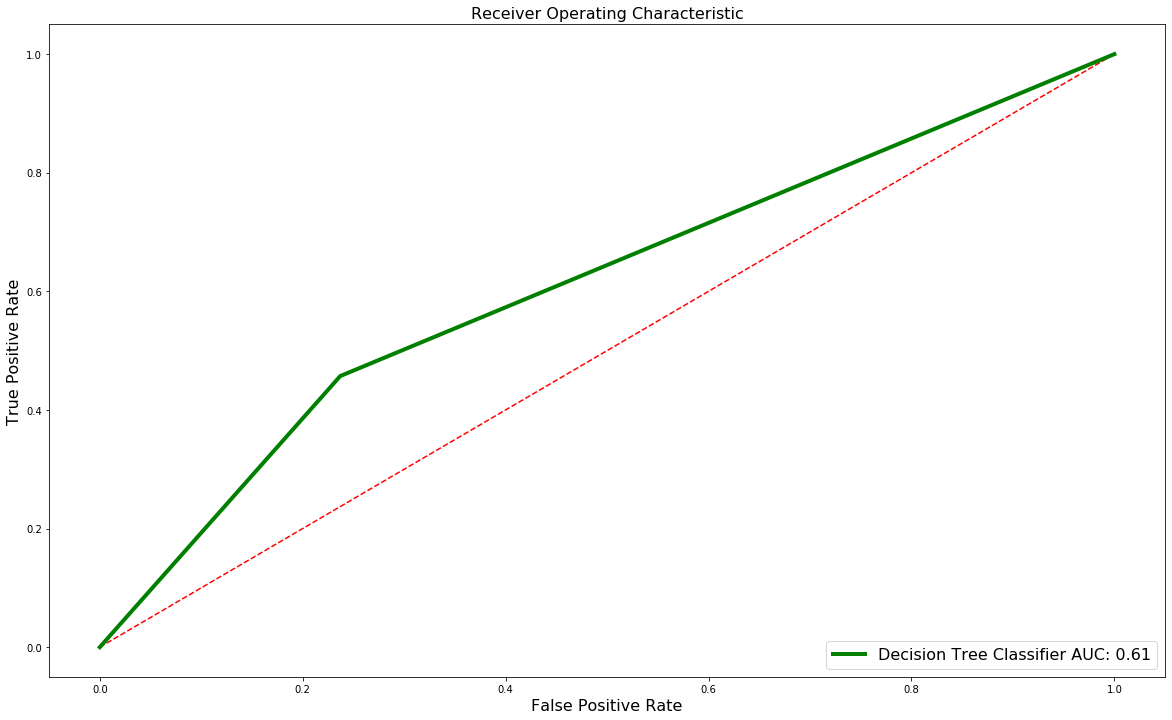

In [42]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize = (20, 12))
plt.plot([0,1], [0,1], 'r--')

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

label = 'SVM Classifier AUC:' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)

## Classification problem cp3

In [27]:
# The target variable has 2 values - 
# Value '0' for 'No Readmit' or 'readmit > 30 days'
# Value '1' for 'Readmit <30 days'


# The original cleaned data was imbalanced, hence upsampling and downsampling is done
# Test Train split is done prior to balancing exercise
# Three datasets are available post balancing -  cp3_test.csv,  cp3_train_upsampled.csv, cp3_train_downsampled.csv


In [28]:
# Read the datasets

df_cp3_test = pd.read_csv('.\cp3\cp3_test.csv')
df_cp3_train_up = pd.read_csv('.\cp3\cp3_train_upsampled.csv')
df_cp3_train_dn = pd.read_csv('.\cp3\cp3_train_downsampled.csv')

In [29]:
# Check basic Shape of Dataframe

print("\n cp3_test Dataframe Rows = ", len(df_cp3_test.index))
print("\n cp3_test Dataframe Columns = ", len(df_cp3_test.columns))

print("\n cp3_train_upsampled Dataframe Rows = ", len(df_cp3_train_up.index))
print("\n cp3_train_upsampled Dataframe Columns = ", len(df_cp3_train_up.columns))

print("\n cp3_train_downsampled Dataframe Rows = ", len(df_cp3_train_dn.index))
print("\n cp3_train_downsampled Dataframe Columns = ", len(df_cp3_train_dn.columns))


 cp3_test Dataframe Rows =  9950

 cp3_test Dataframe Columns =  44

 cp3_train_upsampled Dataframe Rows =  119460

 cp3_train_upsampled Dataframe Columns =  44

 cp3_train_downsampled Dataframe Rows =  20146

 cp3_train_downsampled Dataframe Columns =  44


In [30]:
df_cp3_test.describe()

,Unnamed: 0,Unnamed: 0.1,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,insulin_Down,insulin_No,insulin_Steady,insulin_Up,readmit_in_30_days
count,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.00000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000
mean,49456.959799,50571.078392,4.351256,43.204925,1.366030,16.068744,0.370151,0.208442,0.621709,7.427739,0.529548,0.470452,0.002010,0.006633,0.016482,0.033970,0.097286,0.169548,0.222010,0.252563,0.170452,0.029045,0.19005,0.006332,0.765528,0.022613,0.015477,0.015578,0.013166,0.946533,0.024724,0.038593,0.078995,0.833065,0.049347,0.467638,0.532362,0.226432,0.773568,0.124724,0.468141,0.300704,0.106432,0.110151
std,28758.813538,29378.202022,2.966753,19.695386,1.717011,8.142792,1.340424,1.291307,1.206247,1.928294,0.499151,0.499151,0.044791,0.081178,0.127328,0.181161,0.296362,0.375254,0.415619,0.434504,0.376049,0.167942,0.39236,0.079323,0.423690,0.148674,0.123448,0.123842,0.113990,0.224975,0.155289,0.192632,0.269744,0.372936,0.216602,0.498977,0.498977,0.418543,0.418543,0.330422,0.499009,0.458587,0.308405,0.313093
min,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24561.000000,24951.250000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49232.000000,50492.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,74439.500000,75955.500000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,99491.000000,101765.000000,14.000000,114.000000,6.000000,81.000000,40.000000,76.000000,17.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0

In [31]:
df_cp3_train_up.describe()

,Unnamed: 0,Unnamed: 0.1,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,insulin_Down,insulin_No,insulin_Steady,insulin_Up,readmit_in_30_days
count,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000
mean,49554.913720,50670.601724,4.492717,43.297798,1.321639,16.247857,0.389034,0.241646,0.797991,7.509811,0.541713,0.458287,0.001247,0.005985,0.017094,0.037887,0.092299,0.165428,0.222074,0.259585,0.171137,0.027264,0.193412,0.006395,0.766407,0.019663,0.014122,0.014967,0.013569,0.945421,0.026042,0.036246,0.078127,0.838356,0.047271,0.467813,0.532187,0.223472,0.776528,0.128662,0.454771,0.300402,0.116164,0.334765
std,28673.468919,29292.077221,3.008409,19.586193,1.684592,8.132117,1.268861,1.021879,1.511874,1.890921,0.498259,0.498259,0.035295,0.077133,0.129621,0.190924,0.289448,0.371568,0.415643,0.438409,0.376630,0.162853,0.394975,0.079716,0.423118,0.138842,0.117994,0.121423,0.115695,0.227157,0.159261,0.186904,0.268372,0.368126,0.212219,0.498965,0.498965,0.416574,0.416574,0.334827,0.497952,0.458435,0.320423,0.471910
min,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24620.000000,25011.000000,2.000000,32.000000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49286.500000,50546.500000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,74318.250000,75830.250000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,99490.000000,101764.000000,14.000000,132.000000,6.000000,79.000000,42.000000,64.000000,19.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000

In [32]:
df_cp3_train_dn.describe()

,Unnamed: 0,Unnamed: 0.1,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,insulin_Down,insulin_No,insulin_Steady,insulin_Up,readmit_in_30_days
count,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000
mean,49440.038866,50552.866971,4.573662,43.617889,1.310483,16.451951,0.403356,0.271816,0.903256,7.563238,0.543979,0.456021,0.001142,0.005559,0.016778,0.037973,0.095602,0.162811,0.221731,0.260498,0.171101,0.026804,0.197856,0.006354,0.764072,0.018068,0.013650,0.015090,0.014494,0.944058,0.026358,0.035789,0.077087,0.838876,0.048248,0.471111,0.528889,0.218753,0.781247,0.132880,0.447235,0.299811,0.120073,0.500000
std,28635.276768,29253.984891,3.018806,19.497763,1.671464,8.158902,1.297770,1.114082,1.644963,1.860351,0.498074,0.498074,0.033770,0.074356,0.128440,0.191135,0.294052,0.369203,0.415422,0.438917,0.376607,0.161515,0.398393,0.079458,0.424588,0.133201,0.116037,0.121913,0.119519,0.229815,0.160200,0.185768,0.266736,0.367654,0.214295,0.499177,0.499177,0.413411,0.413411,0.339453,0.497220,0.458187,0.325055,0.500012
min,11.000000,11.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24434.500000,24823.500000,2.000000,32.000000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49325.000000,50585.000000,4.000000,45.000000,1.000000,15.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,73964.250000,75459.000000,6.000000,57.000000,2.000000,21.000000,0.000000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,99488.000000,101762.000000,14.000000,132.000000,6.000000,75.000000,42.000000,64.000000,21.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0

In [33]:
df_cp3_test.sample(5)

,Unnamed: 0,Unnamed: 0.1,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,insulin_Down,insulin_No,insulin_Steady,insulin_Up,readmit_in_30_days
7581,14859,15124,2,42,1,14,0,0,1,8,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0
5080,67639,68990,1,4,1,24,0,8,1,9,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0
5270,88737,90677,3,1,0,2,0,0,0,6,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1
1897,70894,72280,4,55,0,8,0,0,3,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1
7203,88147,90075,5,64,0,17,0,2,2,9,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0


In [34]:
df_cp3_train_up.sample(5)

,Unnamed: 0,Unnamed: 0.1,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,insulin_Down,insulin_No,insulin_Steady,insulin_Up,readmit_in_30_days
21163,8738,8905,4,40,5,20,0,0,1,8,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0
86157,54237,55518,3,68,1,18,2,1,1,9,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1
111190,62698,64021,2,62,1,13,0,1,8,9,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1
45740,82553,84329,1,47,2,12,0,0,0,9,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0
107607,26089,26511,4,53,1,19,2,0,0,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1


In [35]:
df_cp3_train_dn.sample(5)

,Unnamed: 0,Unnamed: 0.1,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,insulin_Down,insulin_No,insulin_Steady,insulin_Up,readmit_in_30_days
6489,80655,82368,4,54,2,23,0,1,1,9,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0
13539,20684,21018,4,20,3,27,0,0,0,4,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1
3910,72254,73683,3,27,2,8,0,0,1,9,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0
6386,91381,93394,14,54,5,36,0,0,0,9,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0
17945,4816,4915,7,58,1,18,0,0,1,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1


In [36]:
# We drop first 2 columns from all 3 datasets since they have some unknown data, probably due to balancing exercise

df_cp3_test=df_cp3_test.drop(columns=list(df_cp3_test)[0:2])
df_cp3_train_up=df_cp3_train_up.drop(columns=list(df_cp3_train_up)[0:2])
df_cp3_train_dn=df_cp3_train_dn.drop(columns=list(df_cp3_train_dn)[0:2])

df_cp1_test=df_cp1_test.reset_index()
df_cp1_train_up=df_cp1_train_up.reset_index()
df_cp1_train_dn=df_cp1_train_dn.reset_index()

y_test=df_cp3_test.pop('readmit_in_30_days')
y_train_up=df_cp3_train_up.pop('readmit_in_30_days')
y_train_dn=df_cp3_train_dn.pop('readmit_in_30_days')

### Kernel tuning

In [ ]:
# For upscaled training dataset

for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    print('Accuracy score using {0} kernel:'.format(kernel), end = ' ')
    fit_predict(df_cp3_train_up, df_cp3_test, y_train_up, y_test, StandardScaler(), kernel)

In [16]:
# For downscaled training dataset

for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    print('Accuracy score using {0} kernel:'.format(kernel), end = ' ')
    fit_predict(df_cp3_train_dn, df_cp3_test, y_train_dn, y_test, StandardScaler(), kernel)

Accuracy score using linear kernel: 0.767437
Accuracy score using poly kernel: 0.610251
Accuracy score using rbf kernel: 0.630653
Accuracy score using sigmoid kernel: 0.545025


In [ ]:

# Looking at results we can see the best score is achieved for 'Downscaled' dataset at kernel 'linear' = 0.767437

# We pick kernel = linear for downscaled 

### Penalty tuning

In [ ]:
# For upscaled training dataset

# for с in np.logspace(-1, 3, base = 2, num = 6):
#    print('Accuracy score using penalty = {0} with rbf kernel:'.format(с), end = ' ')
#    fit_predict(df_cp3_train_up, df_cp3_test, y_train_up, y_test, StandardScaler(),'linear', с)

In [18]:
# For downscaled training dataset

for с in np.logspace(-1, 3, base = 2, num = 6):
    print('Accuracy score using penalty = {0} with linear kernel:'.format(с), end = ' ')
    fit_predict(df_cp3_train_dn, df_cp3_test, y_train_dn, y_test, StandardScaler(),'linear', с)

Accuracy score using penalty = 0.5 with linear kernel: 0.767437
Accuracy score using penalty = 0.8705505632961241 with linear kernel: 0.767337
Accuracy score using penalty = 1.5157165665103982 with linear kernel: 0.767337
Accuracy score using penalty = 2.6390158215457893 with linear kernel: 0.767437
Accuracy score using penalty = 4.59479341998814 with linear kernel: 0.767437
Accuracy score using penalty = 8.0 with linear kernel: 0.767638


In [ ]:
# best score is achieved for 'Downscaled' dataset at 'Penalty' 8.0 = 0.767638

# for 'downscaled' dataset we select 'Penalty' = 8.0


### Final SVM parameters for cp3

In [37]:
svm_clf = SVC(kernel='linear', degree=3, C=8.0)

scaler = StandardScaler()
scaler.fit(df_cp3_train_dn)
df_cp3_train_dn_scaled = scaler.transform(df_cp3_train_dn)
df_cp3_test_scaled = scaler.transform(df_cp3_test)

svm_clf.fit(df_cp3_train_dn_scaled, y_train_dn)

y_pred = svm_clf.predict(df_cp3_test_scaled)

print("Accuracy on test set = ", metrics.accuracy_score(y_test, y_pred))

Accuracy on test set =  0.7676381909547739


### Confusion Matrix

In [43]:
from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[7293 1561]
 [ 751  345]]
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      8854
           1       0.18      0.31      0.23      1096

    accuracy                           0.77      9950
   macro avg       0.54      0.57      0.55      9950
weighted avg       0.83      0.77      0.79      9950



### ROC Curve

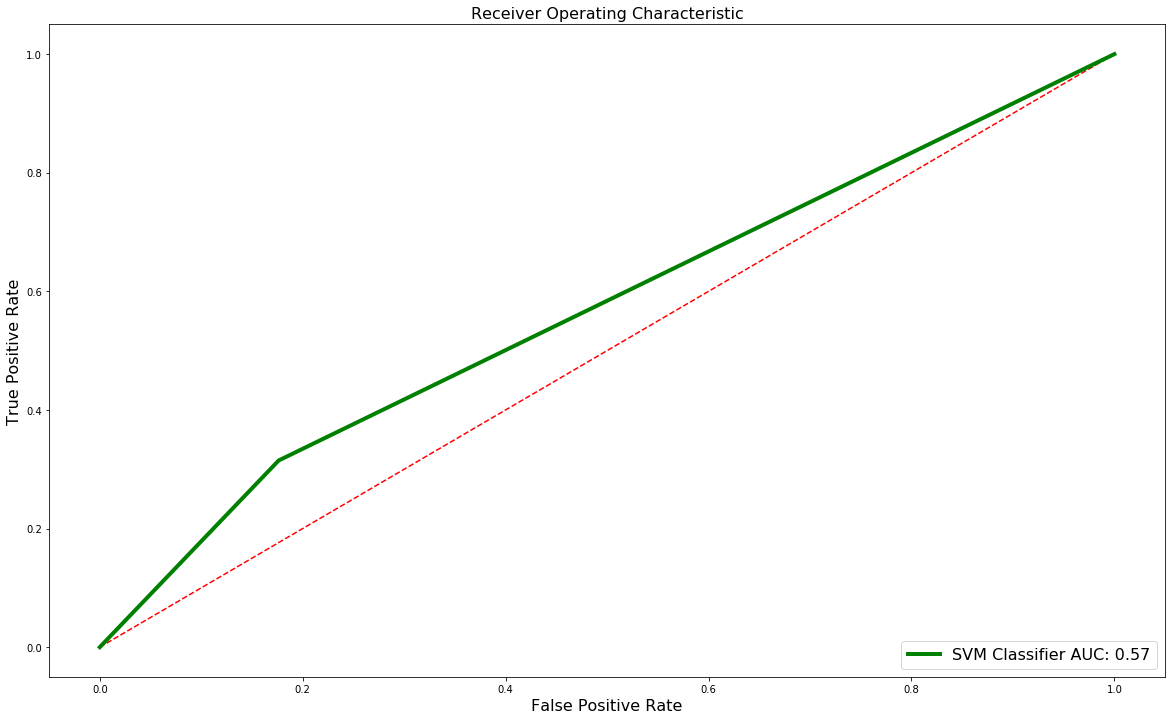

In [44]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize = (20, 12))
plt.plot([0,1], [0,1], 'r--')

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

label = 'SVM Classifier AUC:' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)